In [34]:
import numpy as np
import pandas as pd
import pathlib as p
import seaborn as sb
import matplotlib.pyplot as plt
import pathlib
from pathlib import Path
from datetime import datetime
from IPython.display import Markdown as md
from IPython.display import Math as m


In [35]:
%matplotlib inline

In [36]:
def extractParentDir(dataFileName):
    purePath = pathlib.PurePath(dataFileName)
    parentDir2 = purePath.parent.parent
    return parentDir2

In [37]:
todayVal = datetime.today()
timeStampStr = todayVal.strftime("%y-%m-%d_%H-%M-%S.%f")
data_dir = r"C:\work\dev\dECMT_src\data_all\COVID19_Data\Current"
parentDir2 = extractParentDir(data_dir)
outputPath = Path(parentDir2) / "Output_Covid19_Analysis"/f"{timeStampStr}_bipartite"

In [38]:
comorbidFN = p.Path(data_dir) / "REACT_Comorbidities_unpivoted.csv"
demogFN = p.Path(data_dir) / "REACT_Demographics.csv"
comorbidDF:pd.DataFrame = pd.read_csv(comorbidFN)

In [39]:
comorbidDF:pd.DataFrame = pd.read_csv(comorbidFN)
demogDF:pd.DataFrame = pd.read_csv(demogFN)
covidDemogDF = pd.read_csv(p.Path(data_dir)/ 'REACT_COVID_Demographics.csv')
# **************************
lab_results_df = pd.read_csv(p.Path(data_dir) / 'REACT_LabResults.csv')
# pharmacy_data_df = pd.read_csv(p.Path(data_dir) / 'REACT_PharmacyData.csv')
covid_test_df = pd.read_csv(p.Path(data_dir) / 'REACT_UHSCOVIDTest_processed.csv')


In [40]:
lab_results_df.columns

Index(['STUDY_ID', 'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE', 'SPECIMEN_TIME',
       'REACT_TESTCODE', 'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE',
       'UPPER_RANGE', 'UNIT'],
      dtype='object')

In [41]:
lab_results_df['REACT_TESTCODE'].unique()

array(['GLUCOSE', 'POTASSIUM', 'CREATENINE', 'LDH', 'UREA', 'BILIRUBIN',
       'WBC', 'EOSINOPHILS', 'NEUTROPHILS', 'LYMPHOCYTES', 'ALT', 'CRP',
       'SODIUM', 'HB', 'TRIGYCERIN', 'PLATELETS', 'AST', 'TROPONIN',
       'FERRITIN', 'D_DIMER'], dtype=object)

In [42]:
lab_results_df.describe()


,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE
count,69556.000000,60614.000000,60614.000000
mean,99.503547,35.947517,76.503552
std,378.850807,59.095173,121.243614
min,0.000000,0.000000,0.500000
25%,5.500000,2.000000,7.000000
50%,10.000000,3.000000,7.800000
75%,83.000000,53.000000,115.000000
max,34607.000000,225.000000,425.000000


In [43]:
lab_results_df.head()

,STUDY_ID,PATHOLOGY_SPECIMEN_DATE,SPECIMEN_DATE,SPECIMEN_TIME,REACT_TESTCODE,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE,UNIT
0,UHSCOVID_0dd1b11a,2020-05-27 06:12:00,27/05/2020,06:12:00,GLUCOSE,4.4,NaN,NaN,mmol/L
1,UHSCOVID_2eb34b00,2020-05-24 08:41:00,24/05/2020,08:41:00,POTASSIUM,3.7,3.5,5.3,mmol/L
2,UHSCOVID_2eb34b00,2020-05-24 08:41:00,24/05/2020,08:41:00,CREATENINE,81.0,80.0,115.0,mmol/L
3,UHSCOVID_2eb34b00,2020-05-25 09:13:00,25/05/2020,09:13:00,LDH,747.0,225.0,425.0,units/L
4,UHSCOVID_2eb34b00,2020-05-26 00:00:00,26/05/2020,00:00:00,UREA,5.6,2.5,7.8,mmol/L


In [44]:
lab_results_df=lab_results_df[lab_results_df['REACT_TESTCODE']=='UREA']

In [45]:
lab_results_df.describe()

# Index(['STUDY_ID', 'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE', 'SPECIMEN_TIME',
#        'REACT_TESTCODE', 'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE',
#        'UPPER_RANGE', 'UNIT'],
#       dtype='object')


,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE
count,3626.000000,3626.0,3.626000e+03
mean,9.725262,2.5,7.800000e+00
std,7.187232,0.0,8.883009e-16
min,0.900000,2.5,7.800000e+00
25%,5.100000,2.5,7.800000e+00
50%,7.400000,2.5,7.800000e+00
75%,11.700000,2.5,7.800000e+00
max,48.400000,2.5,7.800000e+00


In [46]:
lab_results_df.columns

Index(['STUDY_ID', 'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE', 'SPECIMEN_TIME',
       'REACT_TESTCODE', 'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE',
       'UPPER_RANGE', 'UNIT'],
      dtype='object')

In [47]:
lab_results_df[['STUDY_ID', 'PATHOLOGY_SPECIMEN_DATE',
       'REACT_TESTCODE', 'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE',
       'UPPER_RANGE', 'UNIT']].head()

,STUDY_ID,PATHOLOGY_SPECIMEN_DATE,REACT_TESTCODE,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE,UNIT
4,UHSCOVID_2eb34b00,2020-05-26 00:00:00,UREA,5.6,2.5,7.8,mmol/L
12,UHSCOVID_01add35c,2020-05-22 10:40:00,UREA,6.9,2.5,7.8,mmol/L
18,UHSCOVID_a693f094,2020-04-06 00:00:00,UREA,5.1,2.5,7.8,mmol/L
19,UHSCOVID_a693f094,2020-04-15 00:00:00,UREA,6.1,2.5,7.8,mmol/L
25,UHSCOVID_a693f094,2020-04-21 12:38:00,UREA,6.9,2.5,7.8,mmol/L


In [48]:
demogDF.describe()

,PATIENT_AGE,GENDER,IS_PREGNANT,HEIG,WEIG,BMI,LOS,LOS_PREPOS
count,614.000000,614.000000,614.000000,277.000000,593.000000,271.000000,614.000000,614.000000
mean,67.929967,1.571661,0.009772,167.709531,75.407437,26.277343,15.838322,3.847264
std,19.635836,0.495241,0.098449,14.785532,21.033713,5.907941,17.310716,9.651141
min,0.000000,1.000000,0.000000,66.000000,0.000000,12.860000,0.000000,-0.370000
25%,55.250000,1.000000,0.000000,160.000000,62.700000,22.255000,4.622500,-0.080000
50%,72.000000,2.000000,0.000000,168.000000,75.000000,25.510000,10.095000,0.010000
75%,83.000000,2.000000,0.000000,177.800000,86.000000,29.895000,21.827500,3.705000
max,103.000000,2.000000,1.000000,198.000000,192.000000,50.560000,173.580000,127.140000


In [49]:
covidDemogDF

,STUDY_ID,PATIENT_AGE,GENDER,ETHNIC_GROUP,POSTCODE,IS_PREGNANT,HEIG,WEIG,BMI,FIRST_POS_DATE,...,DISCHARGEDATE,DISCHARGE_DATE_R,DISCHARGE_TIME_R,LOS,LOS_PREPOS,READM28,READM_DATETIME,READM_DATE,READM_TIME,DOBjan1st
0,UHSCOVID_00989a42,64,M,A,SO19,0,185.00,110.0,32.14,26/03/2020 14:48,...,02/04/2020 10:21,02/04/2020,10:21:00,6.71,-0.10,N,NaN,NaN,NaN,01/01/1956
1,UHSCOVID_00ac1e32,73,M,A,SO21,0,177.80,135.7,42.93,11/04/2020 17:55,...,NaN,NaN,NaN,38.25,4.00,N,NaN,NaN,NaN,01/01/1947
2,UHSCOVID_00cb7bdd,76,F,A,SO16,0,NaN,65.0,NaN,10/04/2020 17:03,...,13/04/2020 02:15,13/04/2020,02:15:00,2.35,-0.04,N,NaN,NaN,NaN,01/01/1944
3,UHSCOVID_01f7838d,97,M,A,SO16,0,NaN,80.0,NaN,11/05/2020 12:12,...,NaN,NaN,NaN,11.63,7.13,N,NaN,NaN,NaN,01/01/1923
4,UHSCOVID_025d562e,62,F,X,SO16,0,NaN,90.0,NaN,01/05/2020 23:58,...,NaN,NaN,NaN,14.11,0.11,N,NaN,NaN,NaN,01/01/1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,UHSCOVID_fc872d82,53,M,A,SO53,0,180.00,110.0,33.95,02/04/2020 16:07,...,NaN,NaN,NaN,52.03,8.70,N,NaN,NaN,NaN,01/01/1967
560,UHSCOVID_fd016c0e,47,M,X,SO15,0,NaN,NaN,NaN,11/04/2020 10:22,...,16/04/2020 21:38,16/04/2020,21:38:00,5.35,-0.12,N,NaN,NaN,NaN,01/01/1973
561,UHSCOVID_fd4da220,70,M,A,SO17,0,NaN,82.0,NaN,14/04/2020 16:44,...,18/04/2020 13:00,18/04/2020,13:00:00,3.87,0.03,N,NaN,NaN,NaN,01/01/1950
562,UHSCOVID_fd893360,67,F,A,SO41,0,NaN,75.0,NaN,29/03/2020 10:53,...,21/04/2020 12:20,21/04/2020,12:20:00,22.93,-0.13,Y,29/04/2020 15:20,29/04/2020,15:20:00,01/01/1953


In [50]:
# Index(['STUDY_ID', 'PATIENT_AGE', 'GENDER', 'ETHNIC_GROUP', 'POSTCODE',
#        'IS_PREGNANT', 'HEIG', 'WEIG', 'BMI', 'FIRST_POS_DATE',
#        'FIRST_POS_DATE_R', 'FIRST_POS_TIME_R', 'ADMIT_DATETIME', 'ADM_DATE_R',
#        'ADM_TIME_R', 'DISCHARGEDATE', 'DISCHARGE_DATE_R', 'DISCHARGE_TIME_R',
#        'LOS', 'LOS_PREPOS', 'READM28', 'READM_DATETIME', 'READM_DATE',
#        'READM_TIME', 'DOBjan1st'],
#       dtype='object')

dates2Convert={
    'covidDemographics':['']
}

In [51]:
# u.convertDatesWTableName(covidDemogDF,'demographics_df')


In [52]:
lab_results_Urea_Agg_df = lab_results_df.groupby('STUDY_ID').agg(UREA_MEAN=('PATHOLOGY_RESULT_NUMERIC', 'mean'),
                                                             UREA_STD=('PATHOLOGY_RESULT_NUMERIC', 'std'),
                                                             UREA_MIN =('PATHOLOGY_RESULT_NUMERIC', 'min'),
                                                             UREA_MAX =('PATHOLOGY_RESULT_NUMERIC', 'max')
                                                             )


In [53]:
lab_results_Urea_Agg_df

,UREA_MEAN,UREA_STD,UREA_MIN,UREA_MAX
STUDY_ID,,,,
UHSCOVID_00989a42,5.450000,0.353553,5.2,5.7
UHSCOVID_01add35c,7.400000,0.707107,6.9,7.9
UHSCOVID_01f7838d,5.100000,NaN,5.1,5.1
UHSCOVID_025d562e,2.750000,0.900000,2.0,4.0
UHSCOVID_0520de1c,16.450000,1.909188,15.1,17.8
...,...,...,...,...
UHSCOVID_f748a293,7.750000,0.519615,7.3,8.5
UHSCOVID_f834fd10,7.881818,2.140943,4.3,10.4
UHSCOVID_f8d03de4,6.807143,2.277470,4.4,12.0


In [54]:
comorbidDF['COMORBIDITY'].unique()
# array(['COPD', 'ASTHMA', 'ILD', 'HYPERTENSION', 'THROMBOEMBOLIC',
#        'CARDIAC_D', 'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR',
#        'MAGLINANT_NEO', 'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D',
#        'DIMENTIA', 'IMMUNO'], dtype=object)


array(['COPD', 'ASTHMA', 'ILD', 'HYPERTENSION', 'THROMBOEMBOLIC',
       'CARDIAC_D', 'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR',
       'MAGLINANT_NEO', 'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D',
       'DIMENTIA', 'IMMUNO'], dtype=object)

In [55]:
comorbidDF['RENAL_D_PRESENT'] = (comorbidDF['COMORBIDITY'] == 'RENAL_D')
comorbidDF.head()

,STUDY_ID,COMORBIDITY,STATUS,RENAL_D_PRESENT
0,UHSCOVID_00989a42,COPD,1,False
1,UHSCOVID_0520de1c,COPD,1,False
2,UHSCOVID_0744a86c,COPD,1,False
3,UHSCOVID_0874d194,COPD,1,False
4,UHSCOVID_0b401459,COPD,1,False


In [56]:
comorbidDF['RENAL_D_PRESENT'].unique()


array([False,  True])

In [57]:
comorbidGrpDF = comorbidDF.groupby('STUDY_ID').agg(RENAL_D_PRESENT=('RENAL_D_PRESENT','any'))
comorbidGrpDF.head()



,RENAL_D_PRESENT
STUDY_ID,
UHSCOVID_00989a42,False
UHSCOVID_00ac1e32,False
UHSCOVID_00cb7bdd,False
UHSCOVID_01add35c,False
UHSCOVID_01f7838d,True


In [58]:
comorbidGrpDF.describe()

,RENAL_D_PRESENT
count,514
unique,2
top,False
freq,348


# Association between Renal disease and Death

In [59]:
dfRes:pd.DataFrame = pd.merge(lab_results_df, comorbidGrpDF, on='STUDY_ID', how='inner')

In [60]:
dfRes.head()

,STUDY_ID,PATHOLOGY_SPECIMEN_DATE,SPECIMEN_DATE,SPECIMEN_TIME,REACT_TESTCODE,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE,UNIT,RENAL_D_PRESENT
0,UHSCOVID_01add35c,2020-05-22 10:40:00,22/05/2020,10:40:00,UREA,6.9,2.5,7.8,mmol/L,False
1,UHSCOVID_01add35c,2020-05-23 14:27:00,23/05/2020,14:27:00,UREA,7.9,2.5,7.8,mmol/L,False
2,UHSCOVID_a693f094,2020-04-06 00:00:00,06/04/2020,00:00:00,UREA,5.1,2.5,7.8,mmol/L,True
3,UHSCOVID_a693f094,2020-04-15 00:00:00,15/04/2020,00:00:00,UREA,6.1,2.5,7.8,mmol/L,True
4,UHSCOVID_a693f094,2020-04-21 12:38:00,21/04/2020,12:38:00,UREA,6.9,2.5,7.8,mmol/L,True


In [61]:
dfRes.describe()

,PATHOLOGY_RESULT_NUMERIC,LOWER_RANGE,UPPER_RANGE
count,3025.000000,3025.0,3.025000e+03
mean,9.789785,2.5,7.800000e+00
std,7.130266,0.0,2.664976e-15
min,0.900000,2.5,7.800000e+00
25%,5.200000,2.5,7.800000e+00
50%,7.500000,2.5,7.800000e+00
75%,11.700000,2.5,7.800000e+00
max,43.900000,2.5,7.800000e+00


In [62]:
dfRes.columns
# 69
# Index(['STUDY_ID', 'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE', 'SPECIMEN_TIME',
#        'REACT_TESTCODE', 'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE',
#        'UPPER_RANGE', 'UNIT', 'RENAL_D_PRESENT'],
#       dtype='object')


Index(['STUDY_ID', 'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE', 'SPECIMEN_TIME',
       'REACT_TESTCODE', 'PATHOLOGY_RESULT_NUMERIC', 'LOWER_RANGE',
       'UPPER_RANGE', 'UNIT', 'RENAL_D_PRESENT'],
      dtype='object')

In [63]:
dfRes.rename(columns = {'PATHOLOGY_RESULT_NUMERIC':'UREA VALUES'},inplace=True)
dfRes.columns

# Index(['STUDY_ID', 'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE', 'SPECIMEN_TIME',
#        'REACT_TESTCODE', 'UREA VALUES', 'LOWER_RANGE', 'UPPER_RANGE', 'UNIT',
#        'RENAL_D_PRESENT'],
#       dtype='object')


Index(['STUDY_ID', 'PATHOLOGY_SPECIMEN_DATE', 'SPECIMEN_DATE', 'SPECIMEN_TIME',
       'REACT_TESTCODE', 'UREA VALUES', 'LOWER_RANGE', 'UPPER_RANGE', 'UNIT',
       'RENAL_D_PRESENT'],
      dtype='object')

## Distribution of Values of Urea

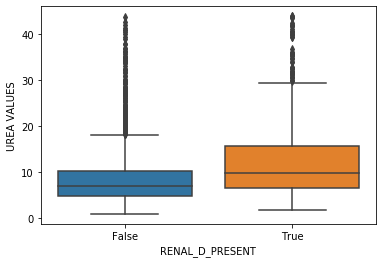

In [64]:
sb.boxplot(x='RENAL_D_PRESENT',y='UREA VALUES',data=dfRes)
plt.ylabel = "Urea values"

C:\ANACONDA3\envs\dECMT\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x000001BFEFB80648> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


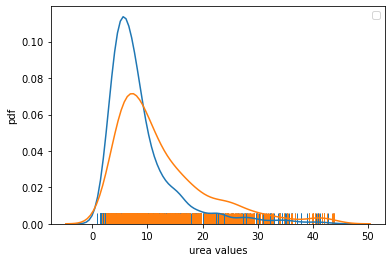

In [65]:
ureaRDT = dfRes[dfRes['RENAL_D_PRESENT']]
ureaRDF = dfRes[~dfRes['RENAL_D_PRESENT']]

ax1 = sb.distplot(ureaRDF[['UREA VALUES']], hist=False, rug=True)
ax2 = sb.distplot(ureaRDT[['UREA VALUES']], hist=False, rug=True)

ax1.set(xlabel="urea values", ylabel = 'pdf')
plt.legend(handles=[ax1, ax1], loc='best')

## Distribution of Means  of Urea Values

In [66]:
dfResAggUrea:pd.DataFrame = pd.merge(lab_results_Urea_Agg_df, comorbidGrpDF, on='STUDY_ID', how='inner')
dfResAggUrea.head()


,UREA_MEAN,UREA_STD,UREA_MIN,UREA_MAX,RENAL_D_PRESENT
STUDY_ID,,,,,
UHSCOVID_00989a42,5.45,0.353553,5.2,5.7,False
UHSCOVID_01add35c,7.40,0.707107,6.9,7.9,False
UHSCOVID_01f7838d,5.10,NaN,5.1,5.1,True
UHSCOVID_025d562e,2.75,0.900000,2.0,4.0,False
UHSCOVID_0520de1c,16.45,1.909188,15.1,17.8,True


In [67]:
dfResAggUrea.columns
# Index(['UREA_MEAN', 'UREA_STD', 'UREA_MIN', 'UREA_m', 'RENAL_D_PRESENT'], dtype='object')

Index(['UREA_MEAN', 'UREA_STD', 'UREA_MIN', 'UREA_MAX', 'RENAL_D_PRESENT'], dtype='object')

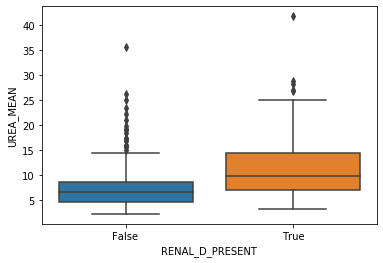

In [68]:
sb.boxplot(x='RENAL_D_PRESENT',y='UREA_MEAN',data=dfResAggUrea)

C:\ANACONDA3\envs\dECMT\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x000001BFEFDF74C8> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


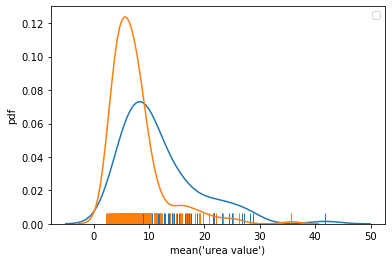

In [69]:
ureaRDT = dfResAggUrea[dfResAggUrea['RENAL_D_PRESENT']]
ureaRDF = dfResAggUrea[~dfResAggUrea['RENAL_D_PRESENT']]

ax1 = sb.distplot(ureaRDT[['UREA_MEAN']], hist=False, rug=True)
ax2 = sb.distplot(ureaRDF[['UREA_MEAN']], hist=False, rug=True)

ax1.set(xlabel="mean('urea value')", ylabel = 'pdf')
plt.legend(handles=[ax1, ax1], loc='best')

## Distribution of Standard Deviations  of Urea Values

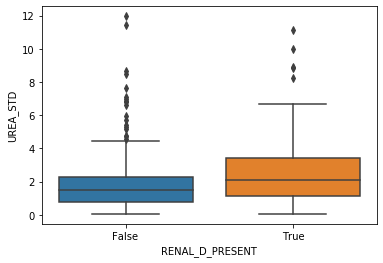

In [70]:
sb.boxplot(x='RENAL_D_PRESENT',y='UREA_STD',data=dfResAggUrea)


C:\ANACONDA3\envs\dECMT\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x000001BFEEFD2448> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


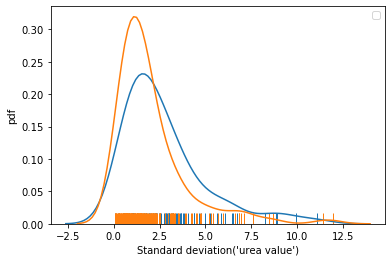

In [71]:
ureaRDT = dfResAggUrea[dfResAggUrea['RENAL_D_PRESENT']]
ureaRDF = dfResAggUrea[~dfResAggUrea['RENAL_D_PRESENT']]

ax1 = sb.distplot(ureaRDT[['UREA_STD']], hist=False, rug=True)
ax2 = sb.distplot(ureaRDF[['UREA_STD']], hist=False, rug=True)

ax1.set(xlabel="Standard deviation('urea value')", ylabel = 'pdf')
plt.legend(handles=[ax1, ax1], loc='best')

## Distribution of Min of Urea Values

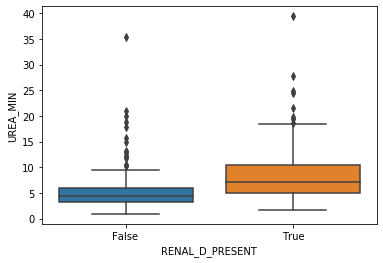

In [72]:
sb.boxplot(x='RENAL_D_PRESENT',y='UREA_MIN',data=dfResAggUrea)


C:\ANACONDA3\envs\dECMT\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x000001BFEF095248> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


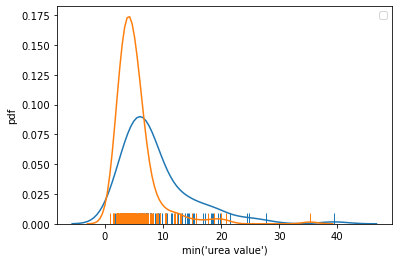

In [73]:
ureaRDT = dfResAggUrea[dfResAggUrea['RENAL_D_PRESENT']]
ureaRDF = dfResAggUrea[~dfResAggUrea['RENAL_D_PRESENT']]

ax1 = sb.distplot(ureaRDT[['UREA_MIN']], hist=False, rug=True)
ax2 = sb.distplot(ureaRDF[['UREA_MIN']], hist=False, rug=True)

ax1.set(xlabel="min('urea value')", ylabel = 'pdf')
plt.legend(handles=[ax1, ax1], loc='best')

## Distribution of Max  of Urea Values

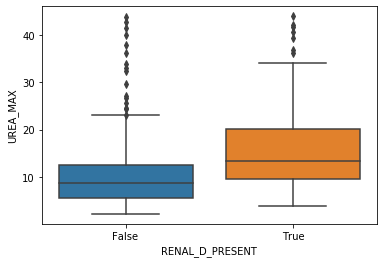

In [74]:
sb.boxplot(x='RENAL_D_PRESENT',y='UREA_MAX',data=dfResAggUrea)

C:\ANACONDA3\envs\dECMT\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x000001BFEFE59E48> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.


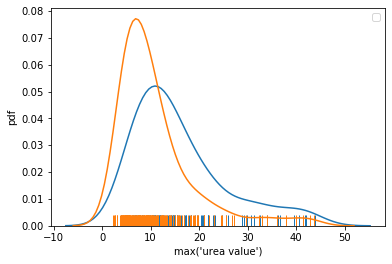

In [75]:
ureaRDT = dfResAggUrea[dfResAggUrea['RENAL_D_PRESENT']]
ureaRDF = dfResAggUrea[~dfResAggUrea['RENAL_D_PRESENT']]

# fig = plt.figure()
# ax = plt.axes()

ax1 = sb.distplot(ureaRDT[['UREA_MAX']], hist=False, rug=True)
ax2 = sb.distplot(ureaRDF[['UREA_MAX']], hist=False, rug=True)
ax1.set(xlabel="max('urea value')", ylabel = 'pdf')
plt.legend(handles=[ax1, ax1], loc='best')
# plt.show()



In [76]:
dfResAggUrea.columns


Index(['UREA_MEAN', 'UREA_STD', 'UREA_MIN', 'UREA_MAX', 'RENAL_D_PRESENT'], dtype='object')